## Import important libraries

In [1]:
import pandas as pd
import numpy as np 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Read data and Show it

In [2]:
data=pd.read_csv("bank.csv")

In [3]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


## Information of data and its description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Cleansing data

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [7]:
data.duplicated().sum()

0

## Data Analysis and Visualization

In [8]:
sum(data[data["age"]<=0]['age'])

0

In [9]:
print(data["age"].min(),data["age"].max())

18 95


In [10]:
data[data["age"]==18]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
2464,18,student,single,unknown,108,no,no,cellular,10,aug,167,1,-1,0,yes
2498,18,student,single,primary,608,no,no,cellular,12,aug,267,1,-1,0,yes
2654,18,student,single,unknown,108,no,no,cellular,8,sep,169,1,-1,0,yes
2935,18,student,single,primary,608,no,no,cellular,13,nov,210,1,93,1,yes
3174,18,student,single,unknown,108,no,no,cellular,9,feb,92,1,183,1,yes
3494,18,student,single,unknown,348,no,no,cellular,5,may,443,4,-1,0,yes
4219,18,student,single,unknown,3,no,no,cellular,25,aug,130,2,-1,0,yes
6456,18,student,single,secondary,5,no,no,cellular,24,aug,143,2,-1,0,no


In [11]:
data[data["age"]==95]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
1582,95,retired,divorced,primary,2282,no,no,telephone,21,apr,207,17,-1,0,yes


In [12]:
def segmented_age(age):
    if age<20:
        return "lower than 20"
    elif age>=20 and age<30:
        return "20-30"
    elif age>=30 and age<40:
        return "30-40"
    elif age>=40 and age<50:
        return "40-50"
    elif age>=50 and age<60:
        return "50-60"
    else:
        return "greater than 60"

In [13]:
data["segmented_age"]=data["age"].apply(segmented_age)
data[["age",'segmented_age']].sample(10)

,age,segmented_age
2501,33,30-40
9991,53,50-60
713,36,30-40
2452,72,greater than 60
3399,55,50-60
7695,31,30-40
9302,50,50-60
3408,38,30-40
5344,31,30-40
8850,43,40-50


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\3726980727.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\3726980727.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="segmented_age",y="balance",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\3726980727.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="segmented_age",y="duration",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ip

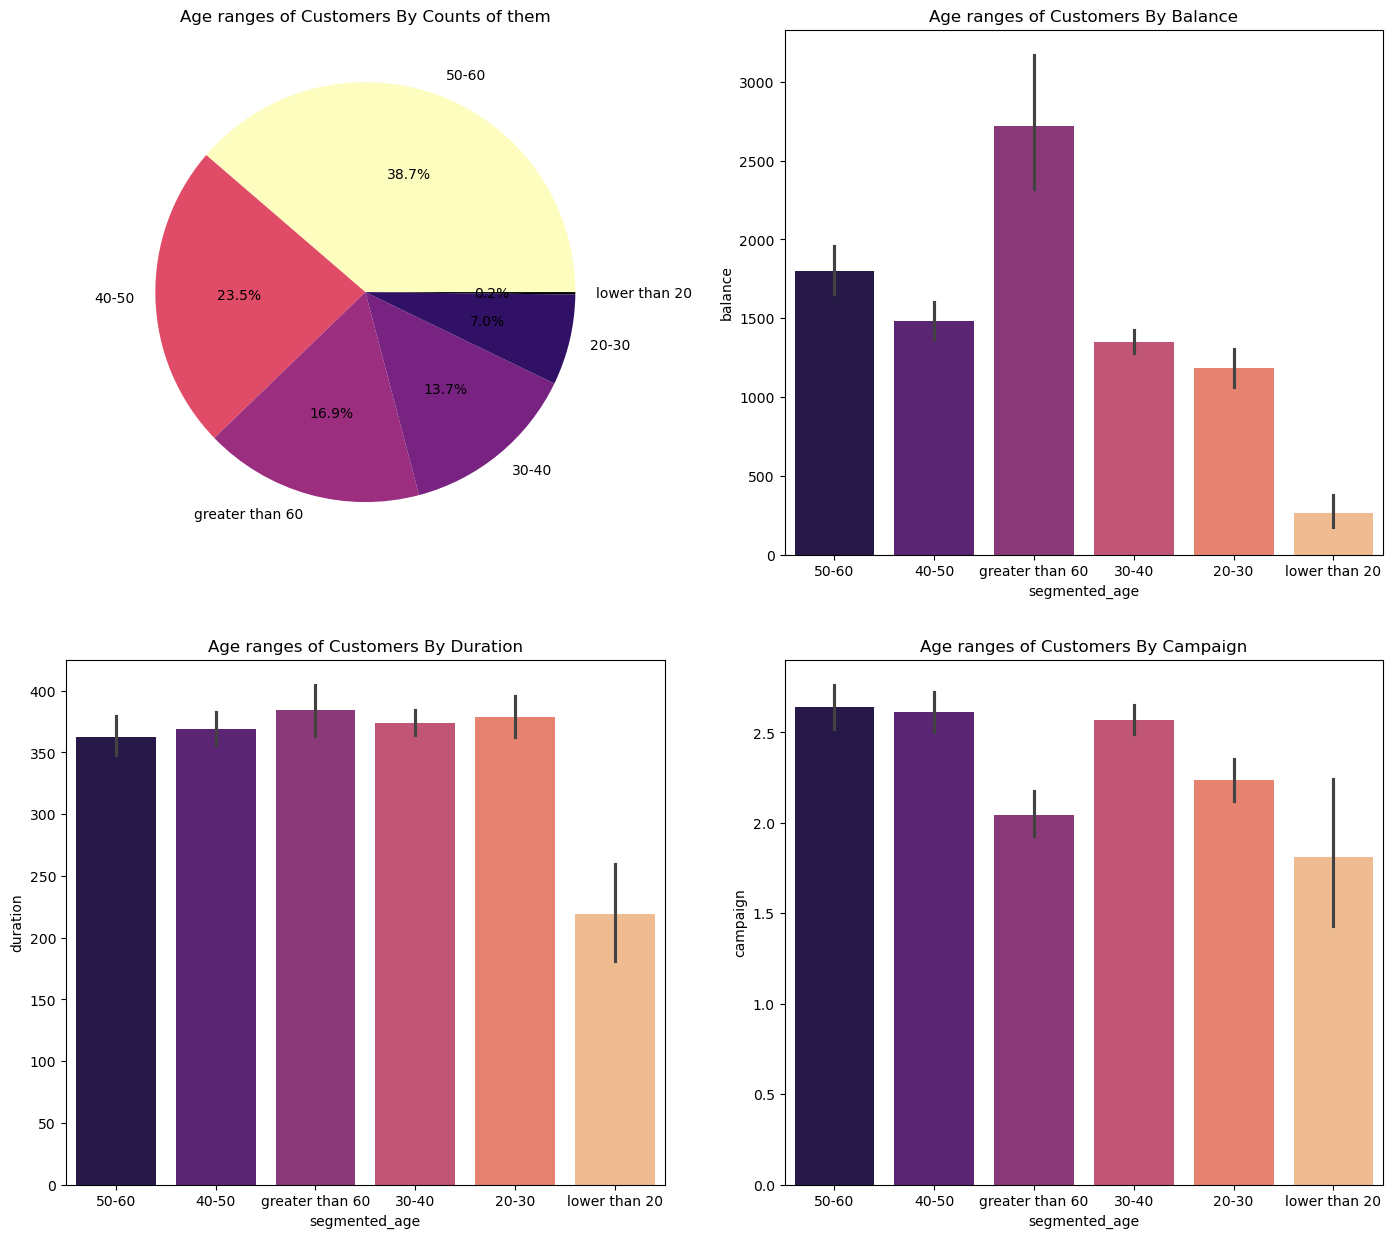

In [14]:
plt.figure(figsize=(17,15))
plt.subplot(2,2,1)
cmap = cm.get_cmap('magma')

# Normalize the sizes for the colormap
norm = plt.Normalize(min(data["segmented_age"].value_counts()), max(data["segmented_age"].value_counts()))
colors = cmap(norm(data["segmented_age"].value_counts()))
plt.pie(data["segmented_age"].value_counts(),labels=data["segmented_age"].unique(),colors=colors,autopct='%1.1f%%')
plt.title("Age ranges of Customers By Counts of them")
#plt.legend(loc="upper left")
plt.subplot(2,2,2)
plt.title("Age ranges of Customers By Balance")
sns.barplot(x="segmented_age",y="balance",data=data,palette="magma")
plt.subplot(2,2,3)
plt.title("Age ranges of Customers By Duration")
sns.barplot(x="segmented_age",y="duration",data=data,palette="magma")
plt.subplot(2,2,4)
plt.title("Age ranges of Customers By Campaign")
sns.barplot(x="segmented_age",y="campaign",data=data,palette="magma")
plt.show()

In [15]:
data["job"].nunique()

12

In [16]:
data["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [17]:
data["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\3981935144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="balance",y="job",data=data,palette="magma",orient='h')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\3981935144.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="duration",y="job",data=data,palette="magma",orient='h')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\3981935144.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="campaign",y="job",data=data,palette="magma",orient='h')
C:\Users\Mahmoud\AppData\Loc

<Axes: title={'center': 'Job of Customers By day'}, xlabel='day', ylabel='job'>

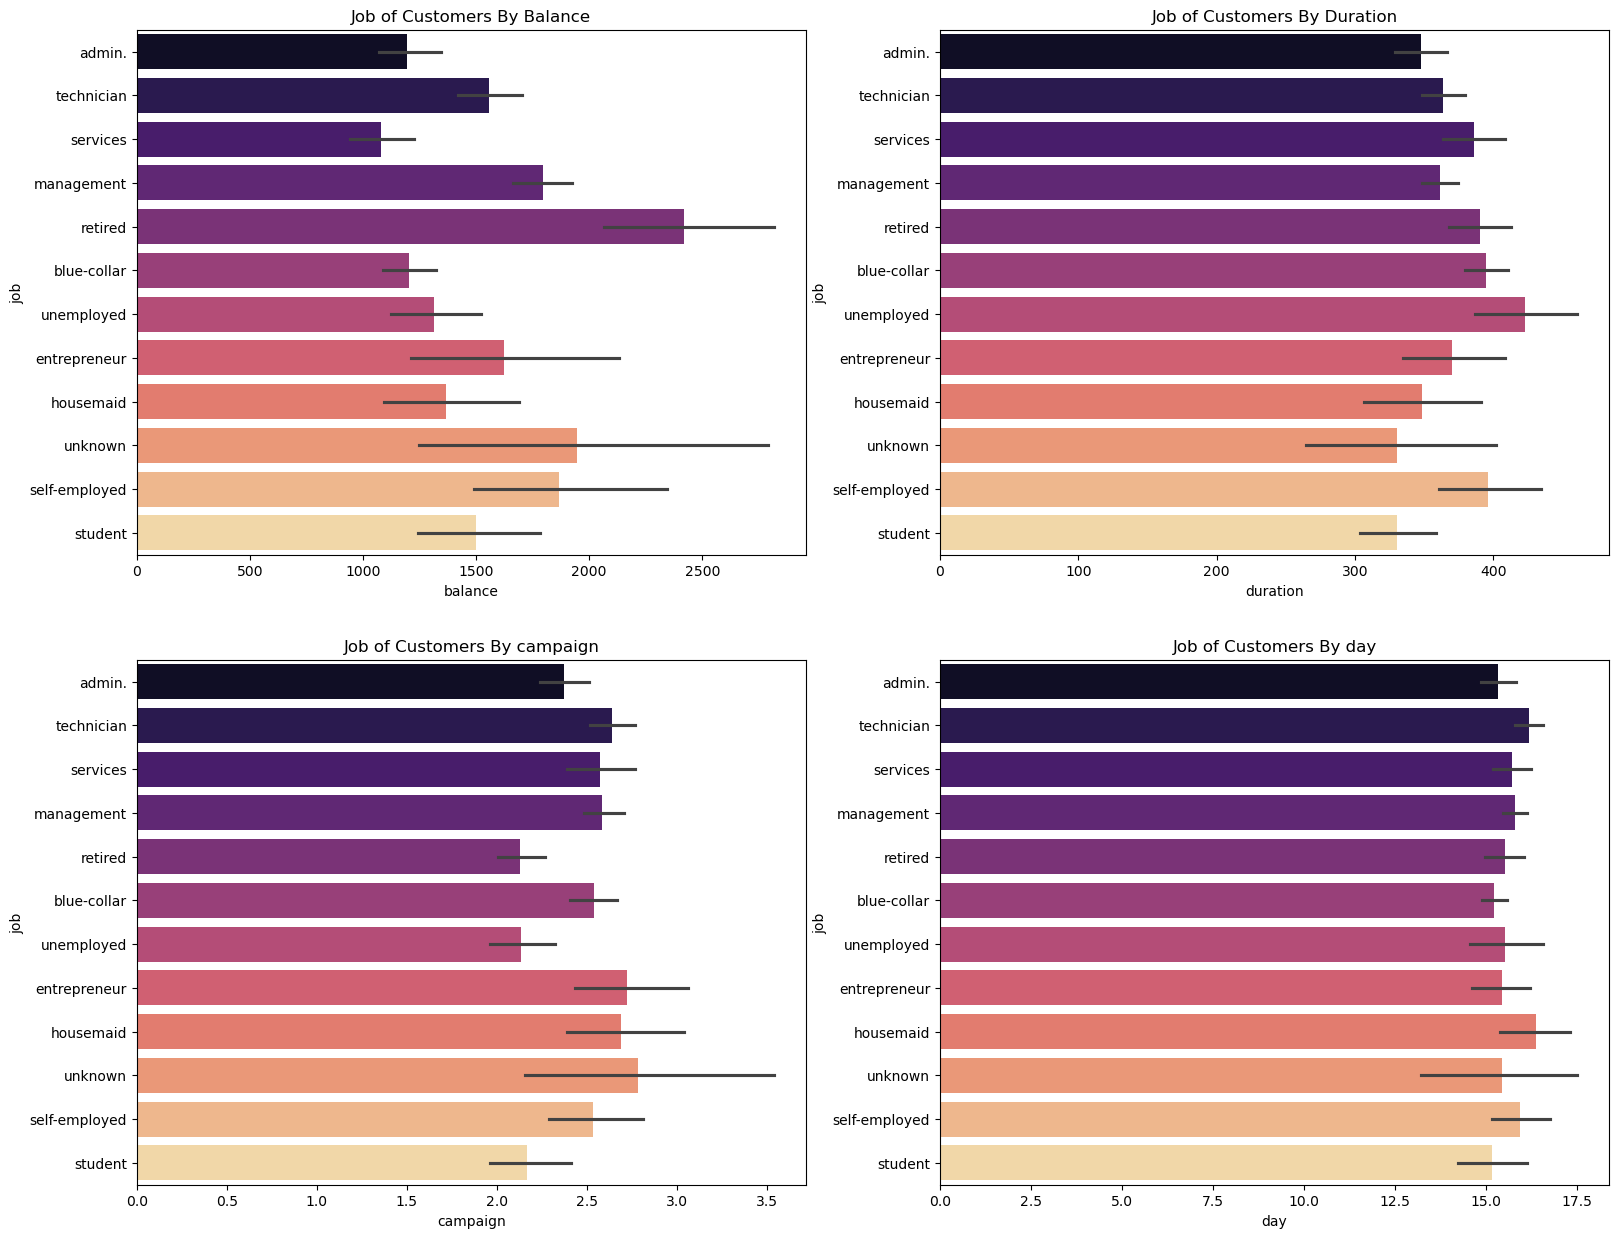

In [18]:
plt.figure(figsize=(19,15))
plt.subplot(2,2,1)
plt.title("Job of Customers By Balance")
sns.barplot(x="balance",y="job",data=data,palette="magma",orient='h')
plt.subplot(2,2,2)
plt.title("Job of Customers By Duration")
sns.barplot(x="duration",y="job",data=data,palette="magma",orient='h')
plt.subplot(2,2,3)
plt.title("Job of Customers By campaign")
sns.barplot(x="campaign",y="job",data=data,palette="magma",orient='h')
plt.subplot(2,2,4)
plt.title("Job of Customers By day")
sns.barplot(x="day",y="job",data=data,palette="magma",orient='h')

In [19]:
data["marital"].nunique()

3

In [20]:
data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
data["marital"].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\2520578652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="balance",x="marital",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\2520578652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="duration",x="marital",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\2520578652.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="campaign",x="marital",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_700

<Axes: title={'center': 'marital of Customers By day'}, xlabel='marital', ylabel='day'>

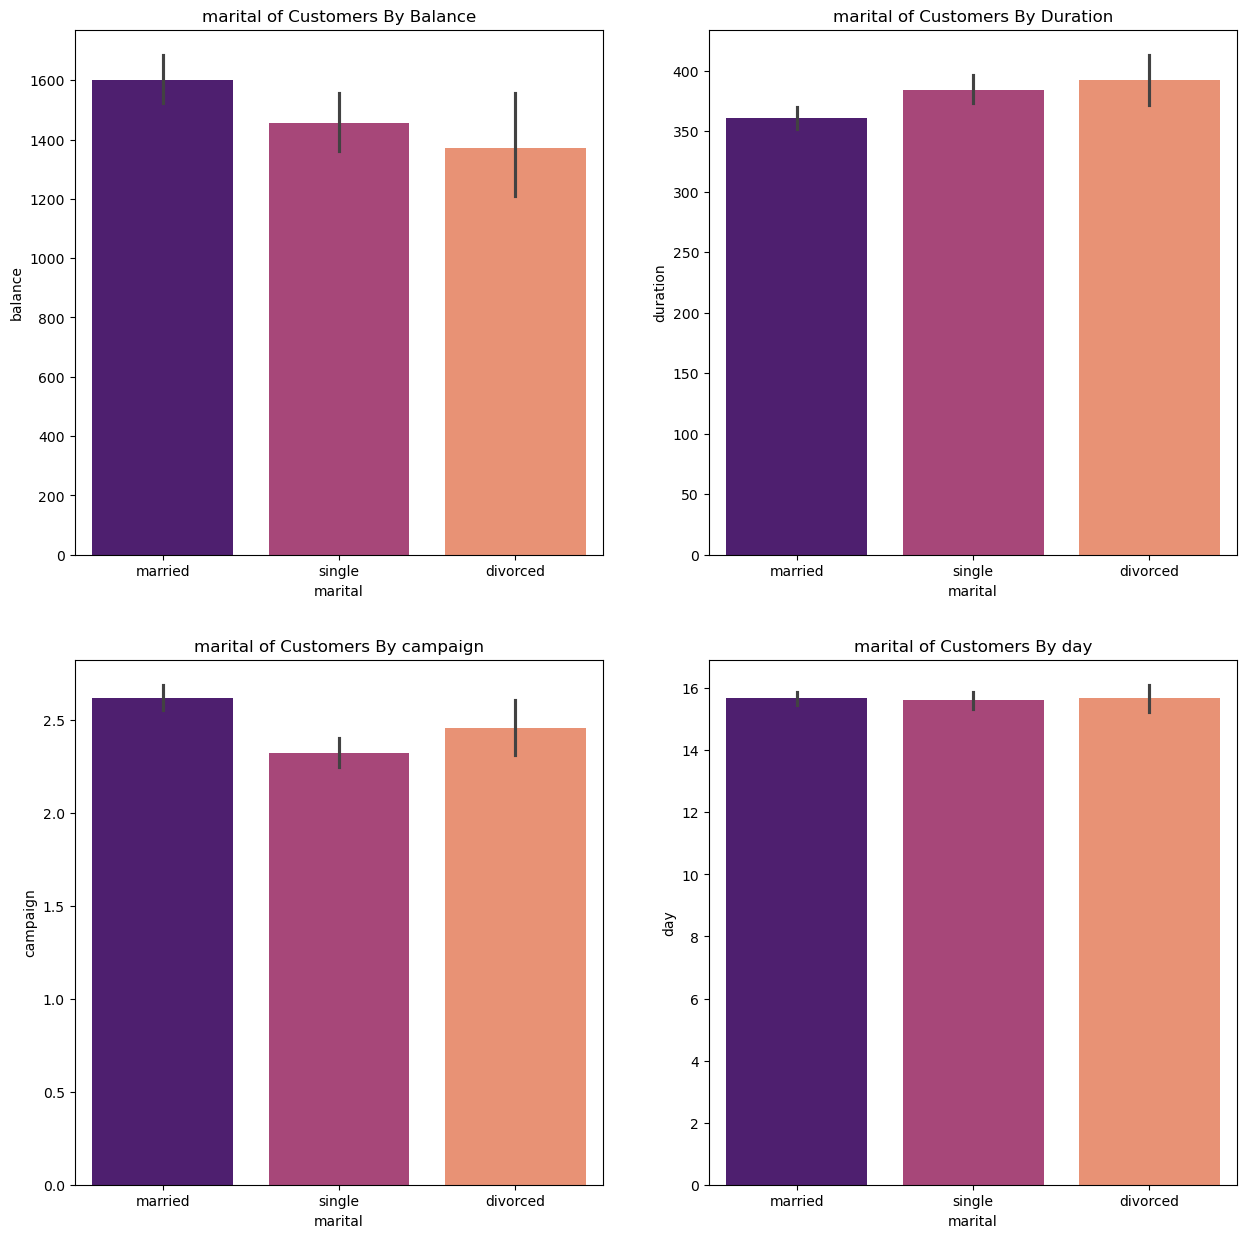

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("marital of Customers By Balance")
sns.barplot(y="balance",x="marital",data=data,palette="magma")
plt.subplot(2,2,2)
plt.title("marital of Customers By Duration")
sns.barplot(y="duration",x="marital",data=data,palette="magma")
plt.subplot(2,2,3)
plt.title("marital of Customers By campaign")
sns.barplot(y="campaign",x="marital",data=data,palette="magma")
plt.subplot(2,2,4)
plt.title("marital of Customers By day")
sns.barplot(y="day",x="marital",data=data,palette="magma")

In [23]:
data["education"].nunique()

4

In [24]:
data["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [25]:
data["education"].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\732257029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="balance",y="education",data=data,palette="magma",orient='h')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\732257029.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="duration",y="education",data=data,palette="magma",orient='h')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\732257029.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="campaign",y="education",data=data,palette="magma",orient='h')
C:\Users\Mahm

<Axes: title={'center': 'education of Customers By day'}, xlabel='day', ylabel='education'>

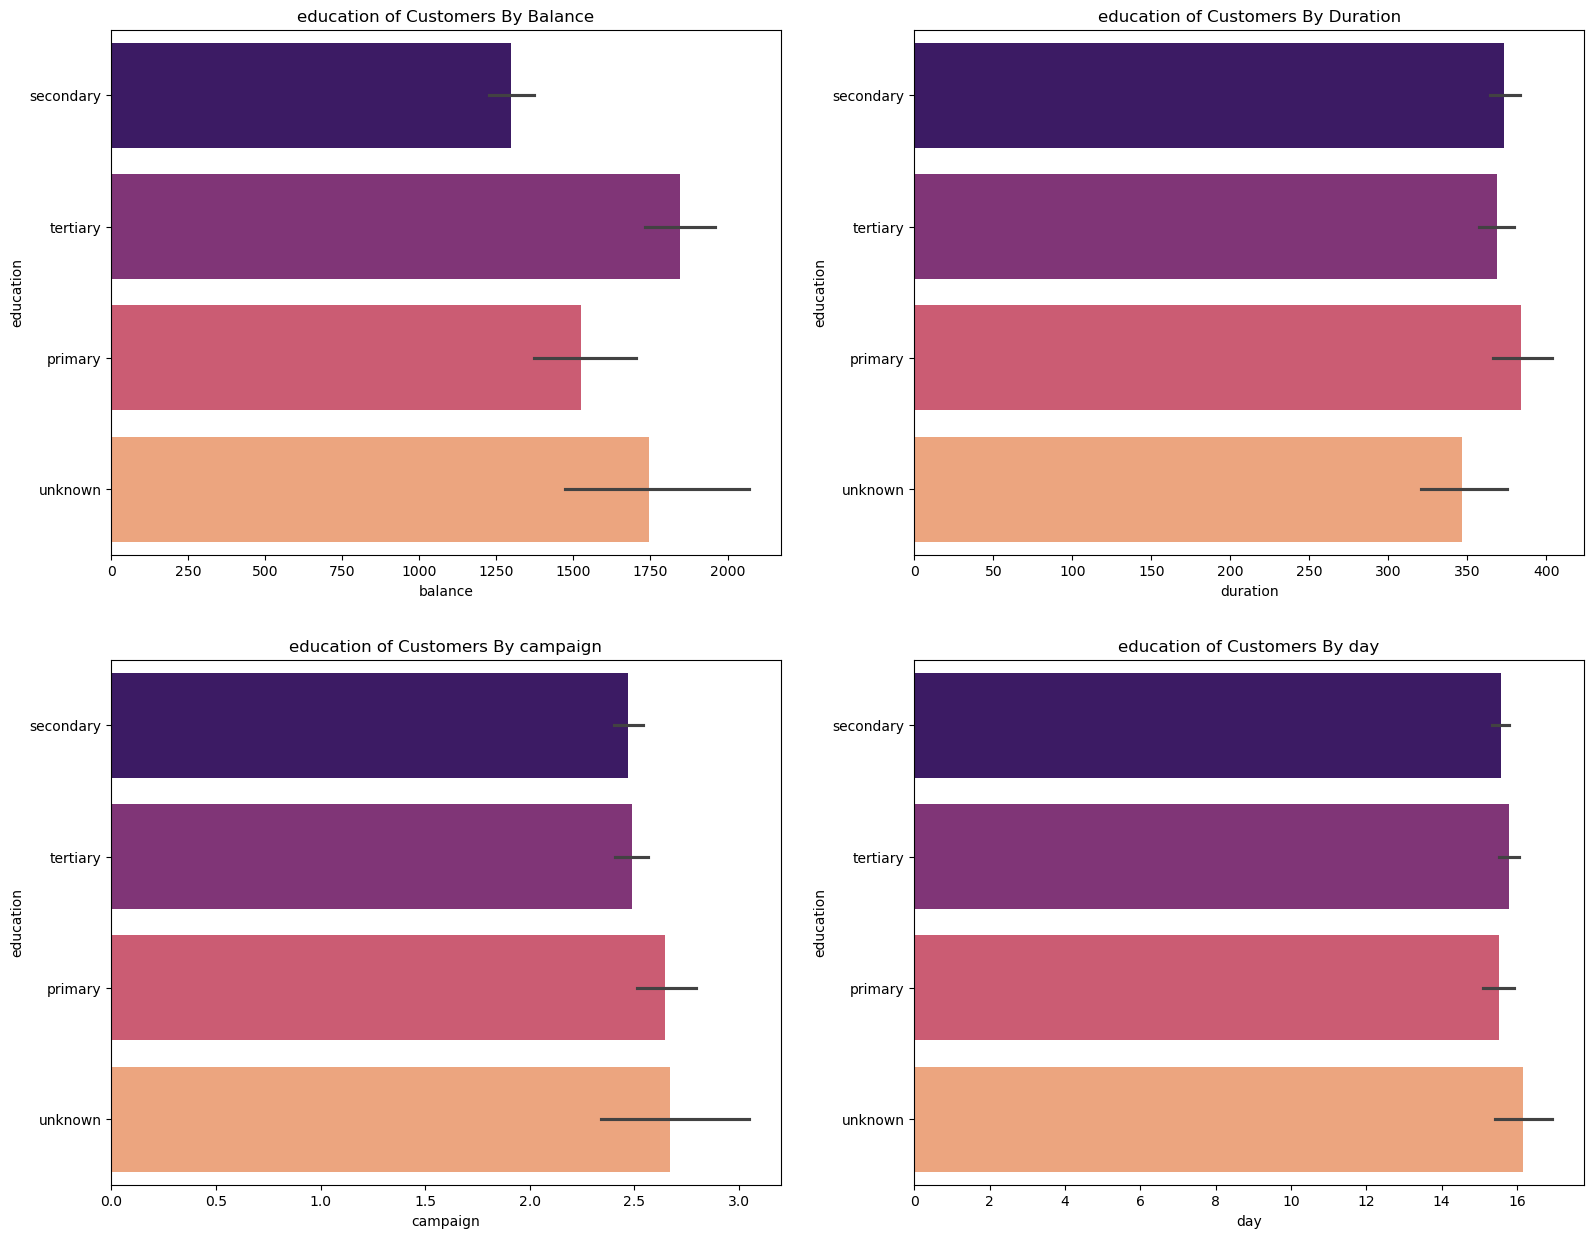

In [26]:
plt.figure(figsize=(19,15))
plt.subplot(2,2,1)
plt.title("education of Customers By Balance")
sns.barplot(x="balance",y="education",data=data,palette="magma",orient='h')
plt.subplot(2,2,2)
plt.title("education of Customers By Duration")
sns.barplot(x="duration",y="education",data=data,palette="magma",orient='h')
plt.subplot(2,2,3)
plt.title("education of Customers By campaign")
sns.barplot(x="campaign",y="education",data=data,palette="magma",orient='h')
plt.subplot(2,2,4)
plt.title("education of Customers By day")
sns.barplot(x="day",y="education",data=data,palette="magma",orient='h')

In [27]:
data["housing"].nunique()

2

In [28]:
data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [29]:
data["housing"].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\5955514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="balance",x="housing",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\5955514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="duration",x="housing",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\5955514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="campaign",x="housing",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\5955514

<Axes: title={'center': 'housing of Customers By day'}, xlabel='housing', ylabel='day'>

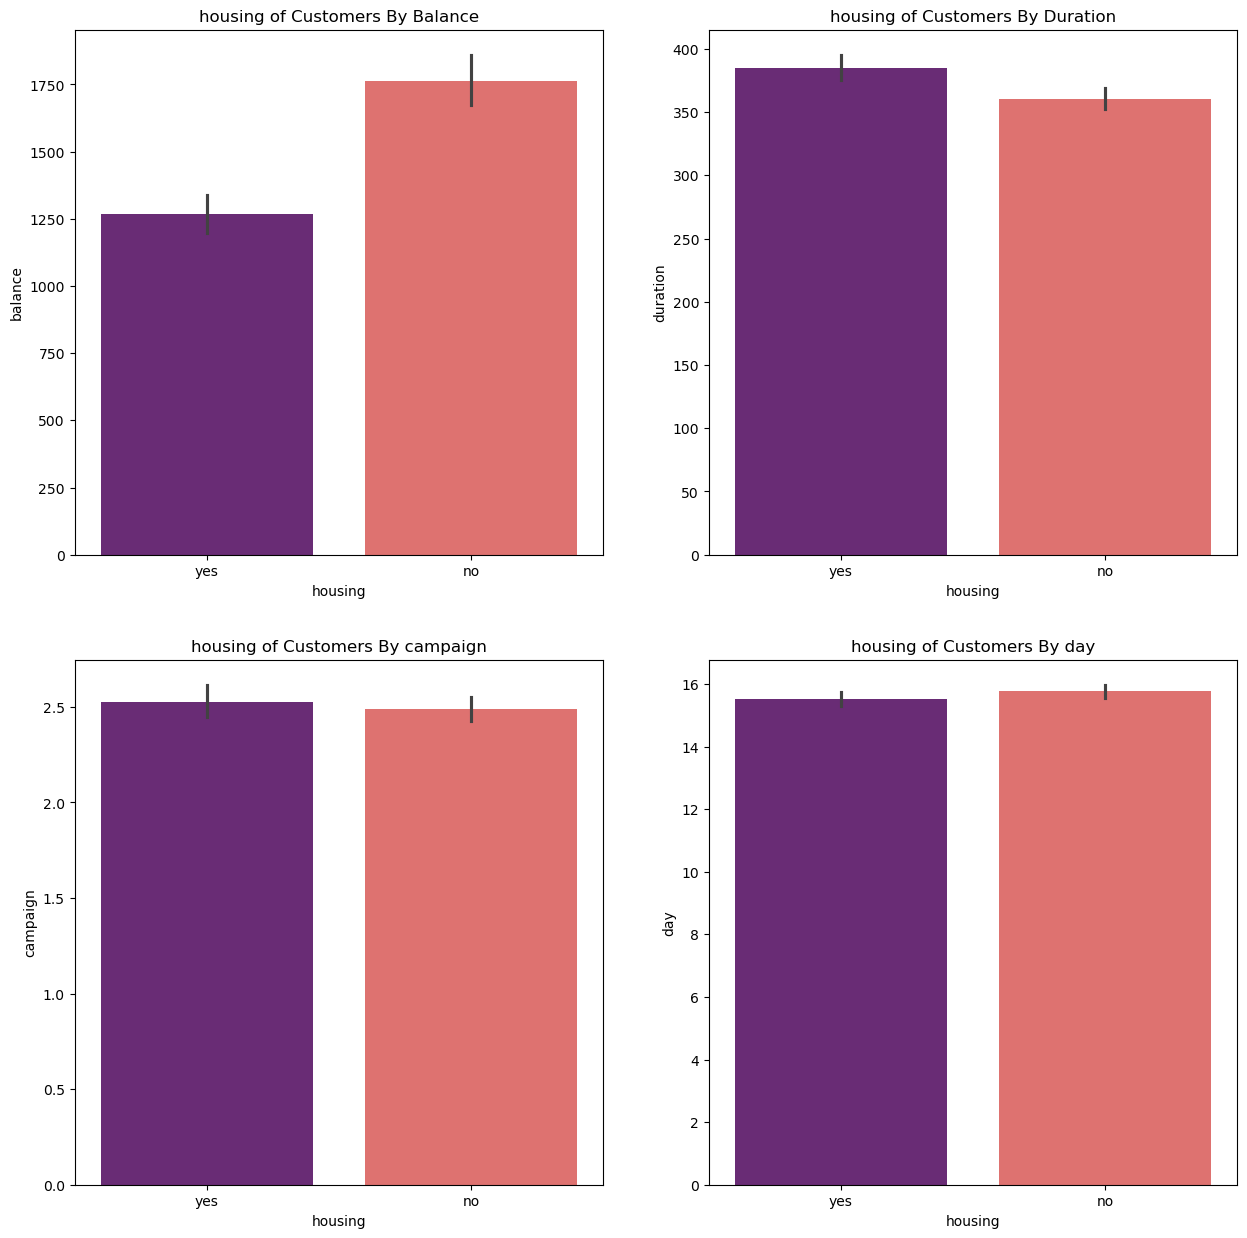

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("housing of Customers By Balance")
sns.barplot(y="balance",x="housing",data=data,palette="magma")
plt.subplot(2,2,2)
plt.title("housing of Customers By Duration")
sns.barplot(y="duration",x="housing",data=data,palette="magma")
plt.subplot(2,2,3)
plt.title("housing of Customers By campaign")
sns.barplot(y="campaign",x="housing",data=data,palette="magma")
plt.subplot(2,2,4)
plt.title("housing of Customers By day")
sns.barplot(y="day",x="housing",data=data,palette="magma")

In [31]:
data["loan"].nunique()

2

In [32]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [33]:
data["loan"].value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\704474634.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="balance",x="loan",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\704474634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="duration",x="loan",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\704474634.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="campaign",x="loan",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\704474634.

<Axes: title={'center': 'loan of Customers By day'}, xlabel='loan', ylabel='day'>

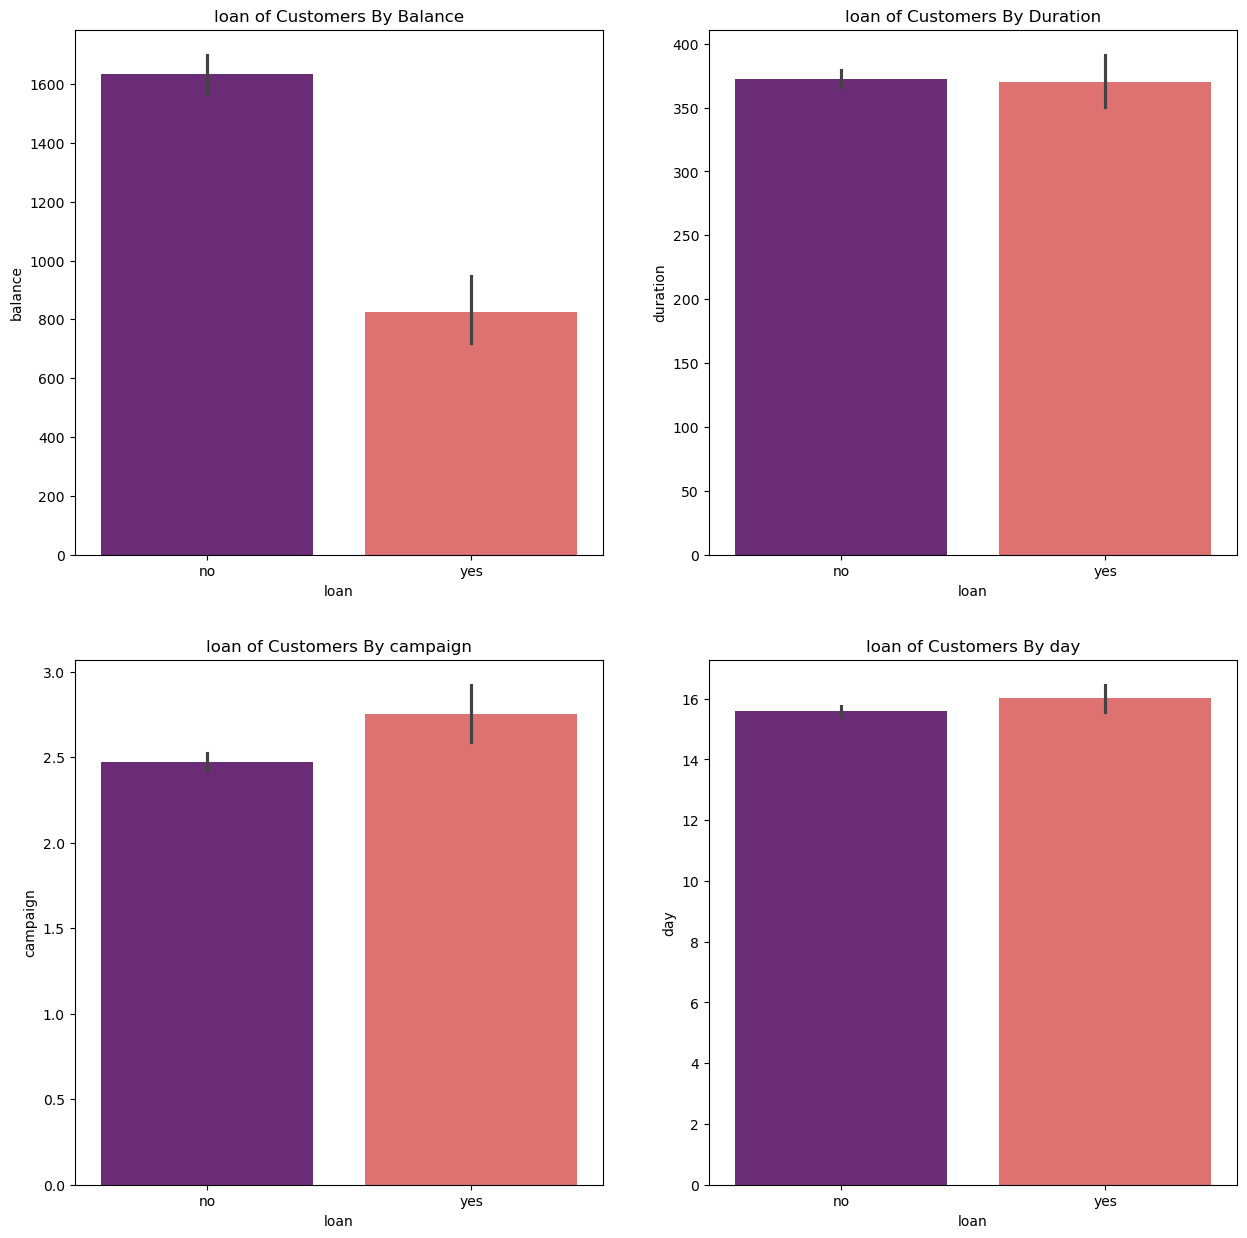

In [34]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("loan of Customers By Balance")
sns.barplot(y="balance",x="loan",data=data,palette="magma")
plt.subplot(2,2,2)
plt.title("loan of Customers By Duration")
sns.barplot(y="duration",x="loan",data=data,palette="magma")
plt.subplot(2,2,3)
plt.title("loan of Customers By campaign")
sns.barplot(y="campaign",x="loan",data=data,palette="magma")
plt.subplot(2,2,4)
plt.title("loan of Customers By day")
sns.barplot(y="day",x="loan",data=data,palette="magma")

In [35]:
data["contact"].nunique()

3

In [36]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [37]:
data["deposit"].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\145943820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="balance",x="contact",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\145943820.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="duration",x="contact",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\145943820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="campaign",x="contact",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\1

<Axes: title={'center': 'contact of Customers By day'}, xlabel='contact', ylabel='day'>

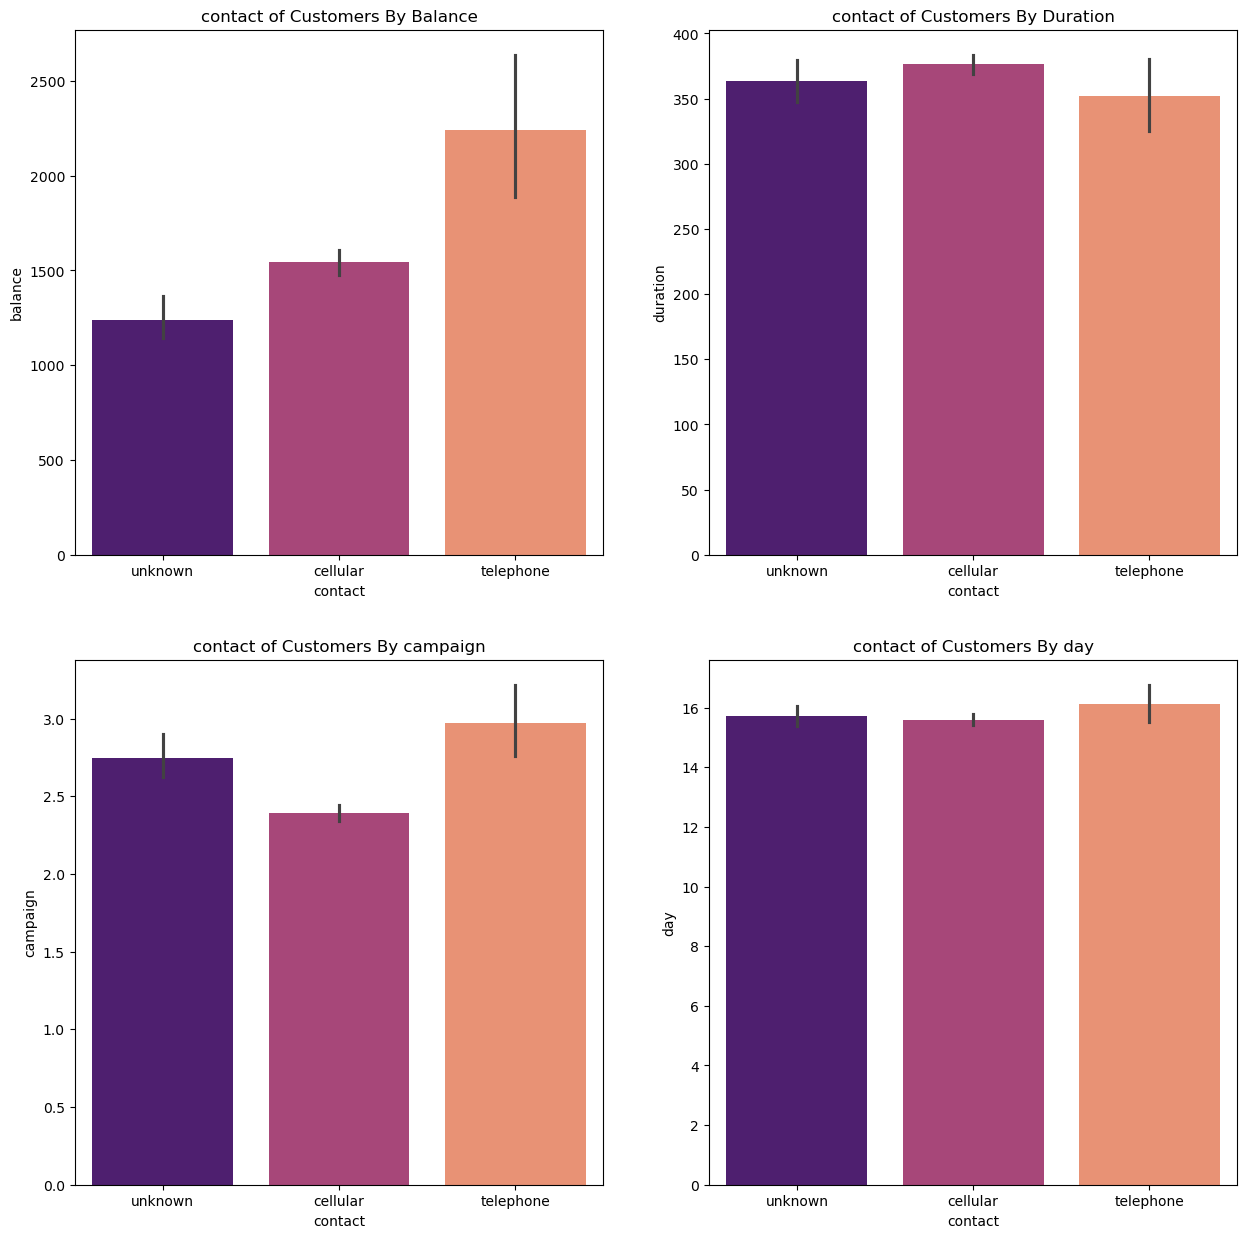

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("contact of Customers By Balance")
sns.barplot(y="balance",x="contact",data=data,palette="magma")
plt.subplot(2,2,2)
plt.title("contact of Customers By Duration")
sns.barplot(y="duration",x="contact",data=data,palette="magma")
plt.subplot(2,2,3)
plt.title("contact of Customers By campaign")
sns.barplot(y="campaign",x="contact",data=data,palette="magma")
plt.subplot(2,2,4)
plt.title("contact of Customers By day")
sns.barplot(y="day",x="contact",data=data,palette="magma")

In [39]:
data["deposit"].nunique()

2

In [40]:
data["deposit"].unique()

array(['yes', 'no'], dtype=object)

In [41]:
data["deposit"].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\790012436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="deposit",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\790012436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="balance",x="deposit",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\790012436.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="duration",x="deposit",data=data,palette="magma")
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\790012436.py

<Axes: title={'center': 'deposit of Customers By day'}, xlabel='deposit', ylabel='day'>

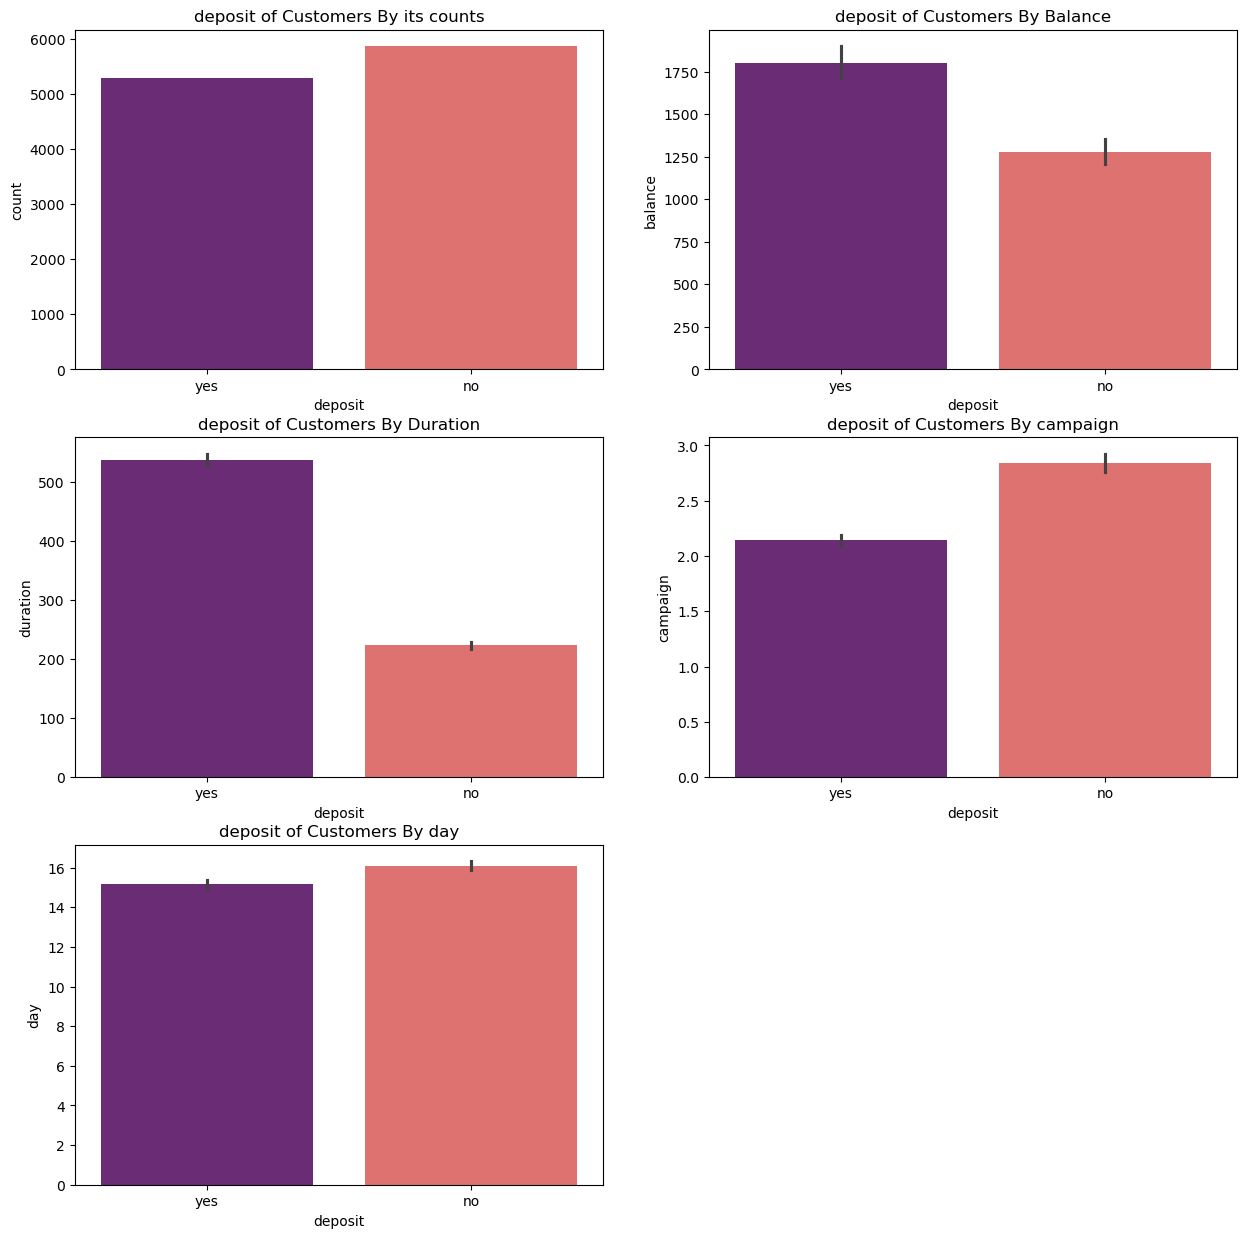

In [42]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title("deposit of Customers By its counts")
sns.countplot(x="deposit",data=data,palette="magma")
plt.subplot(3,2,2)
plt.title("deposit of Customers By Balance")
sns.barplot(y="balance",x="deposit",data=data,palette="magma")
plt.subplot(3,2,3)
plt.title("deposit of Customers By Duration")
sns.barplot(y="duration",x="deposit",data=data,palette="magma")
plt.subplot(3,2,4)
plt.title("deposit of Customers By campaign")
sns.barplot(y="campaign",x="deposit",data=data,palette="magma")
plt.subplot(3,2,5)
plt.title("deposit of Customers By day")
sns.barplot(y="day",x="deposit",data=data,palette="magma")



In [43]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,segmented_age
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes,50-60
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes,50-60
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes,40-50
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes,50-60
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes,50-60


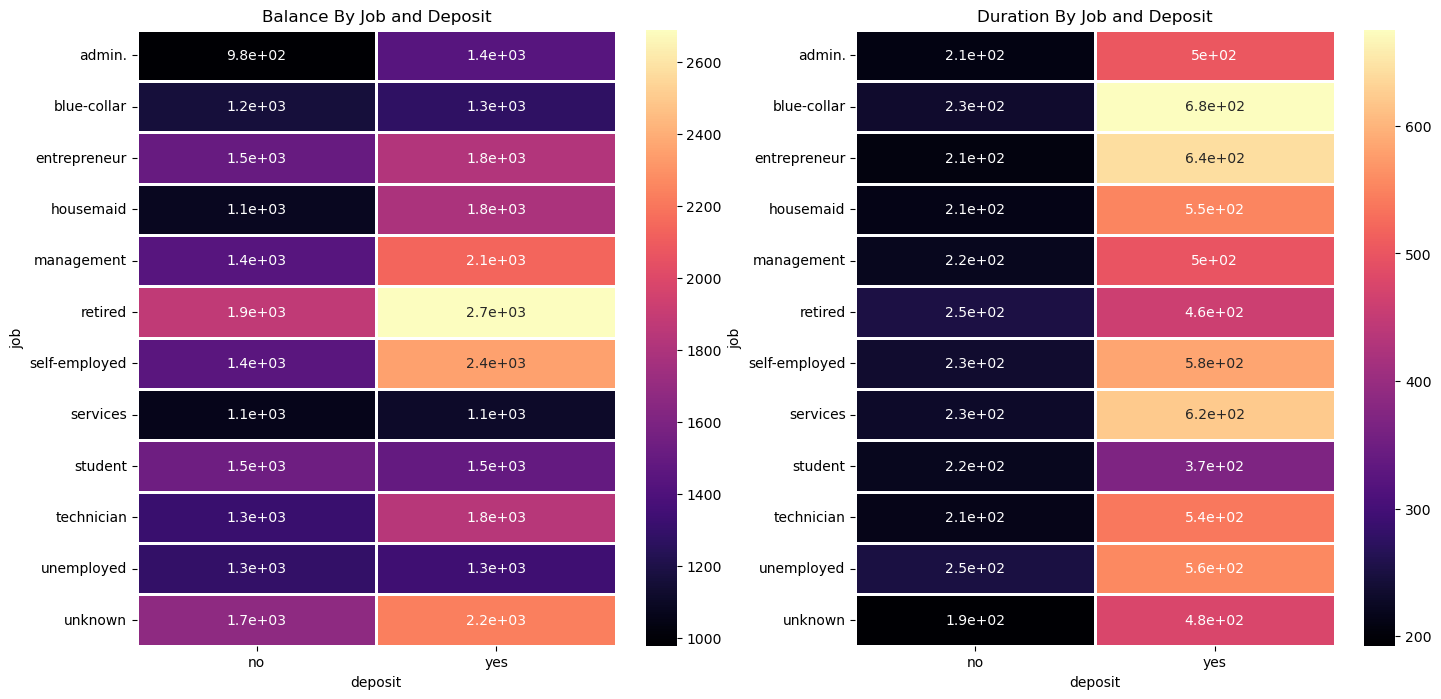

In [44]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title("Balance By Job and Deposit")
balance_job_PT=data.pivot_table(values="balance",index="job",columns="deposit")
sns.heatmap(balance_job_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.subplot(1,2,2)
plt.title("Duration By Job and Deposit")
duration_job_PT=data.pivot_table(values="duration",index="job",columns="deposit")
sns.heatmap(duration_job_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.show()

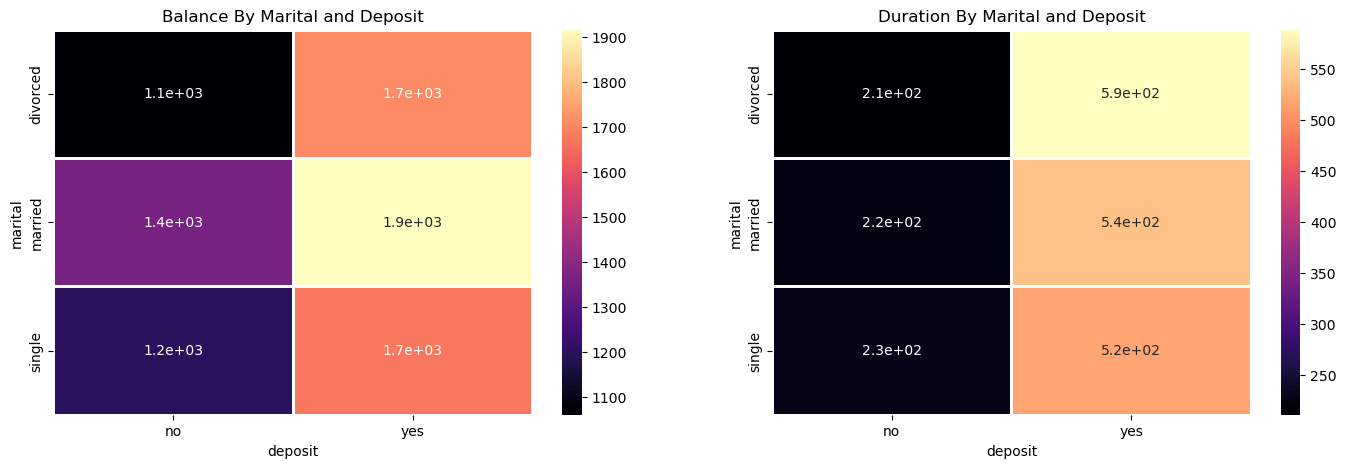

In [45]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title("Balance By Marital and Deposit")
balance_marital_PT=data.pivot_table(values="balance",index="marital",columns="deposit")
sns.heatmap(balance_marital_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.subplot(1,2,2)
plt.title("Duration By Marital and Deposit")
duration_marital_PT=data.pivot_table(values="duration",index="marital",columns="deposit")
sns.heatmap(duration_marital_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.show()

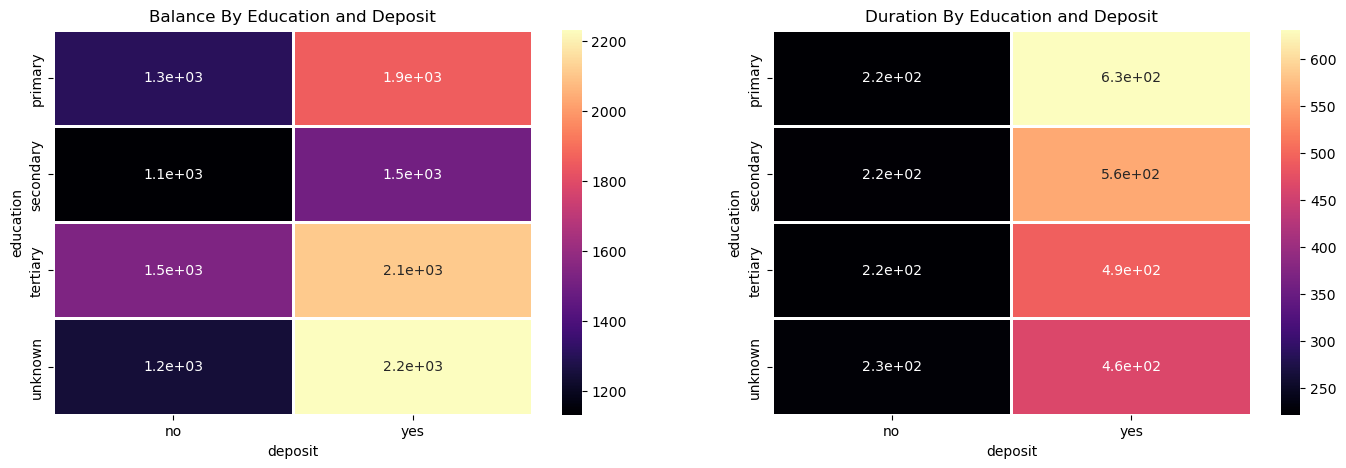

In [46]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title("Balance By Education and Deposit")
balance_education_PT=data.pivot_table(values="balance",index="education",columns="deposit")
sns.heatmap(balance_education_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.subplot(1,2,2)
plt.title("Duration By Education and Deposit")
duration_education_PT=data.pivot_table(values="duration",index="education",columns="deposit")
sns.heatmap(duration_education_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.show()

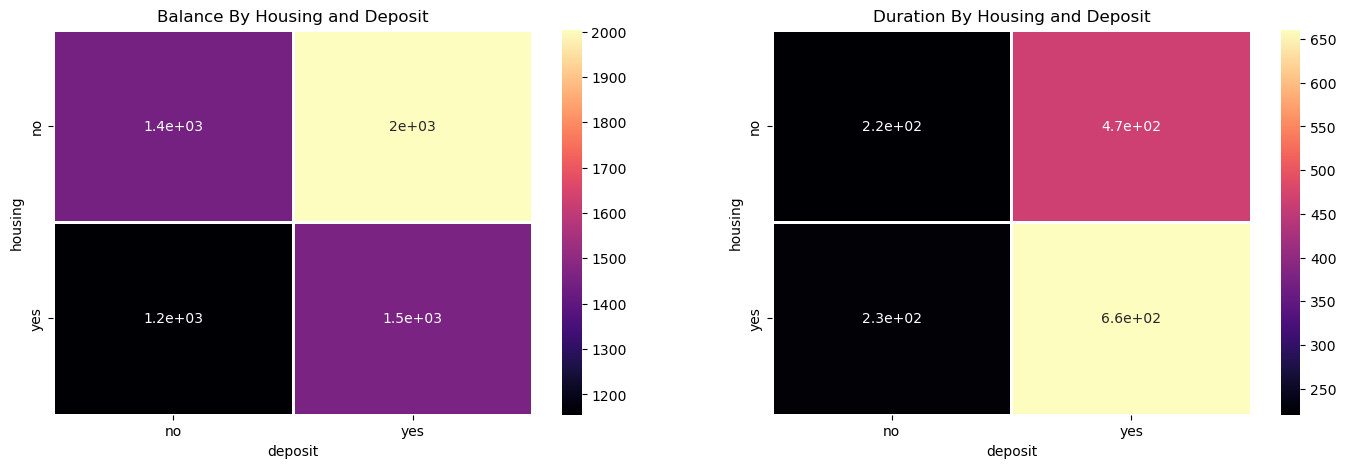

In [47]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title("Balance By Housing and Deposit")
balance_housing_PT=data.pivot_table(values="balance",index="housing",columns="deposit")
sns.heatmap(balance_housing_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.subplot(1,2,2)
plt.title("Duration By Housing and Deposit")
duration_housing_PT=data.pivot_table(values="duration",index="housing",columns="deposit")
sns.heatmap(duration_housing_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.show()

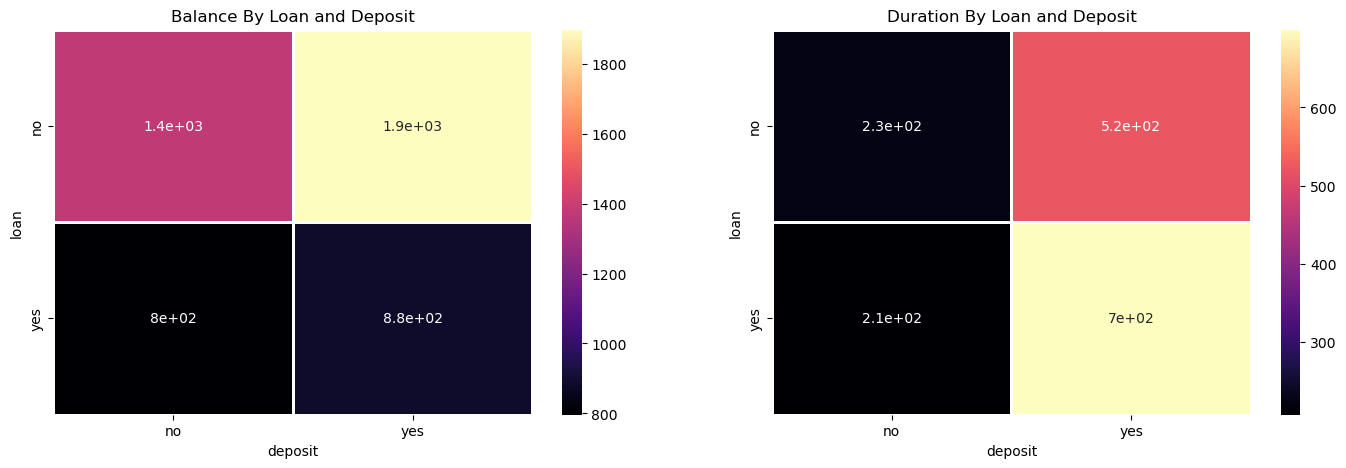

In [48]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title("Balance By Loan and Deposit")
balance_loan_PT=data.pivot_table(values="balance",index="loan",columns="deposit")
sns.heatmap(balance_loan_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.subplot(1,2,2)
plt.title("Duration By Loan and Deposit")
duration_loan_PT=data.pivot_table(values="duration",index="loan",columns="deposit")
sns.heatmap(duration_loan_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.show()

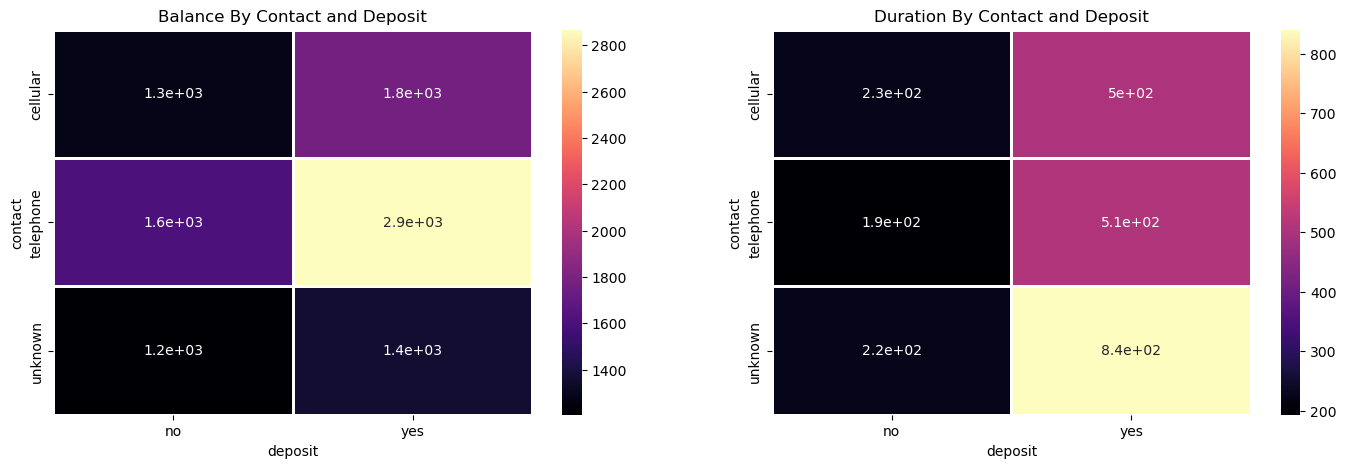

In [49]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title("Balance By Contact and Deposit")
balance_contact_PT=data.pivot_table(values="balance",index="contact",columns="deposit")
sns.heatmap(balance_contact_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.subplot(1,2,2)
plt.title("Duration By Contact and Deposit")
duration_contact_PT=data.pivot_table(values="duration",index="contact",columns="deposit")
sns.heatmap(duration_contact_PT,cmap="magma",linecolor="white",linewidths=1,annot=True)
plt.show()

In [50]:
#Which job ,education ,marital ,contact ,month ,day ,campaign and deposit that has max balance ?
data[data["balance"]==data["balance"].max()]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,segmented_age
3043,84,retired,married,secondary,81204,no,no,telephone,28,dec,679,1,313,2,yes,greater than 60
3380,84,retired,married,secondary,81204,no,no,telephone,1,apr,390,1,94,3,yes,greater than 60


In [51]:
#Which job ,education ,marital ,contact and deposit that has min balance ?
data[data["balance"]==data["balance"].min()]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,segmented_age
6797,49,management,married,tertiary,-6847,no,yes,cellular,21,jul,206,1,-1,0,no,40-50


In [52]:
#Which job ,education ,marital and deposit that has max duration ?
data[data["duration"]==data["duration"].max()]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,segmented_age
271,59,management,married,secondary,1321,no,no,unknown,9,jun,3881,3,-1,0,yes,50-60


In [53]:
#Which job ,education ,marital and deposit that has min duration ?
data[data["duration"]==data["duration"].min()]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,segmented_age
8363,36,blue-collar,married,primary,871,yes,yes,telephone,18,nov,2,1,-1,0,no,30-40


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            11162 non-null  int64 
 1   job            11162 non-null  object
 2   marital        11162 non-null  object
 3   education      11162 non-null  object
 4   balance        11162 non-null  int64 
 5   housing        11162 non-null  object
 6   loan           11162 non-null  object
 7   contact        11162 non-null  object
 8   day            11162 non-null  int64 
 9   month          11162 non-null  object
 10  duration       11162 non-null  int64 
 11  campaign       11162 non-null  int64 
 12  pdays          11162 non-null  int64 
 13  previous       11162 non-null  int64 
 14  deposit        11162 non-null  object
 15  segmented_age  11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


## Data Preprocessing

In [55]:
job_lbl=LabelEncoder()
data["job"]=job_lbl.fit_transform(np.array(data['job']).reshape(-1,1))
data["job"].unique()

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0,  9,  7,  4,  5,  1, 10,  2,  3, 11,  6,  8])

In [56]:
mar_lbl=LabelEncoder()
data["marital"]=mar_lbl.fit_transform(data['marital'])
data["marital"].unique()

array([1, 2, 0])

In [57]:
edu_lbl=LabelEncoder()
data["education"]=edu_lbl.fit_transform(data['education'])
data["education"].unique()

array([1, 2, 0, 3])

In [58]:
house_lbl=LabelEncoder()
data["housing"]=house_lbl.fit_transform(data['housing'])
data["housing"].unique()

array([1, 0])

In [59]:
loan_lbl=LabelEncoder()
data["loan"]=loan_lbl.fit_transform(data['loan'])
data["loan"].unique()

array([0, 1])

In [60]:
con_lbl=LabelEncoder()
data["contact"]=con_lbl.fit_transform(data['contact'])
data["contact"].unique()

array([2, 0, 1])

In [61]:
mon_lbl=LabelEncoder()
data["month"]=mon_lbl.fit_transform(data['month'])
data["month"].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [62]:
dep_lbl=LabelEncoder()
data["deposit"]=dep_lbl.fit_transform(data['deposit'])
data["deposit"].unique()

array([1, 0])

In [63]:
data=data.drop("segmented_age",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   balance    11162 non-null  int64
 5   housing    11162 non-null  int32
 6   loan       11162 non-null  int32
 7   contact    11162 non-null  int32
 8   day        11162 non-null  int64
 9   month      11162 non-null  int32
 10  duration   11162 non-null  int64
 11  campaign   11162 non-null  int64
 12  pdays      11162 non-null  int64
 13  previous   11162 non-null  int64
 14  deposit    11162 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 959.4 KB


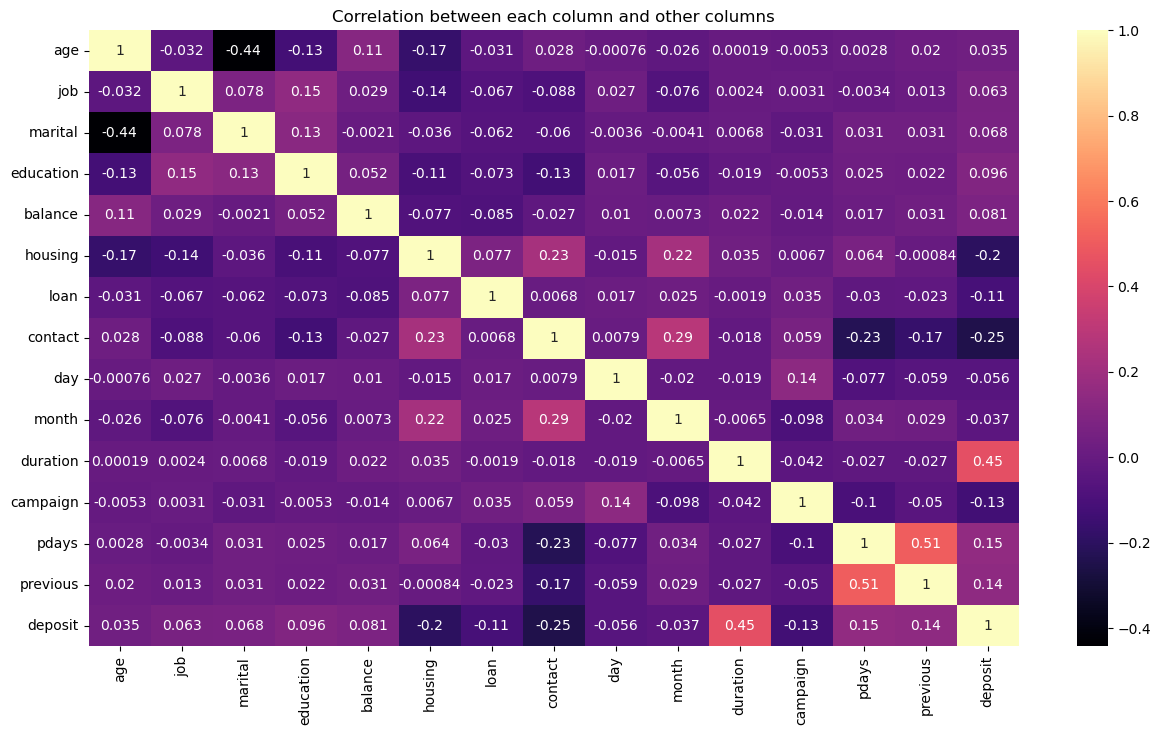

In [64]:
plt.figure(figsize=(15,8))
plt.title("Correlation between each column and other columns")
sns.heatmap(data.corr(),cmap="magma",annot=True)
plt.show()

<Axes: title={'center': 'pday box plot'}, xlabel='pdays'>

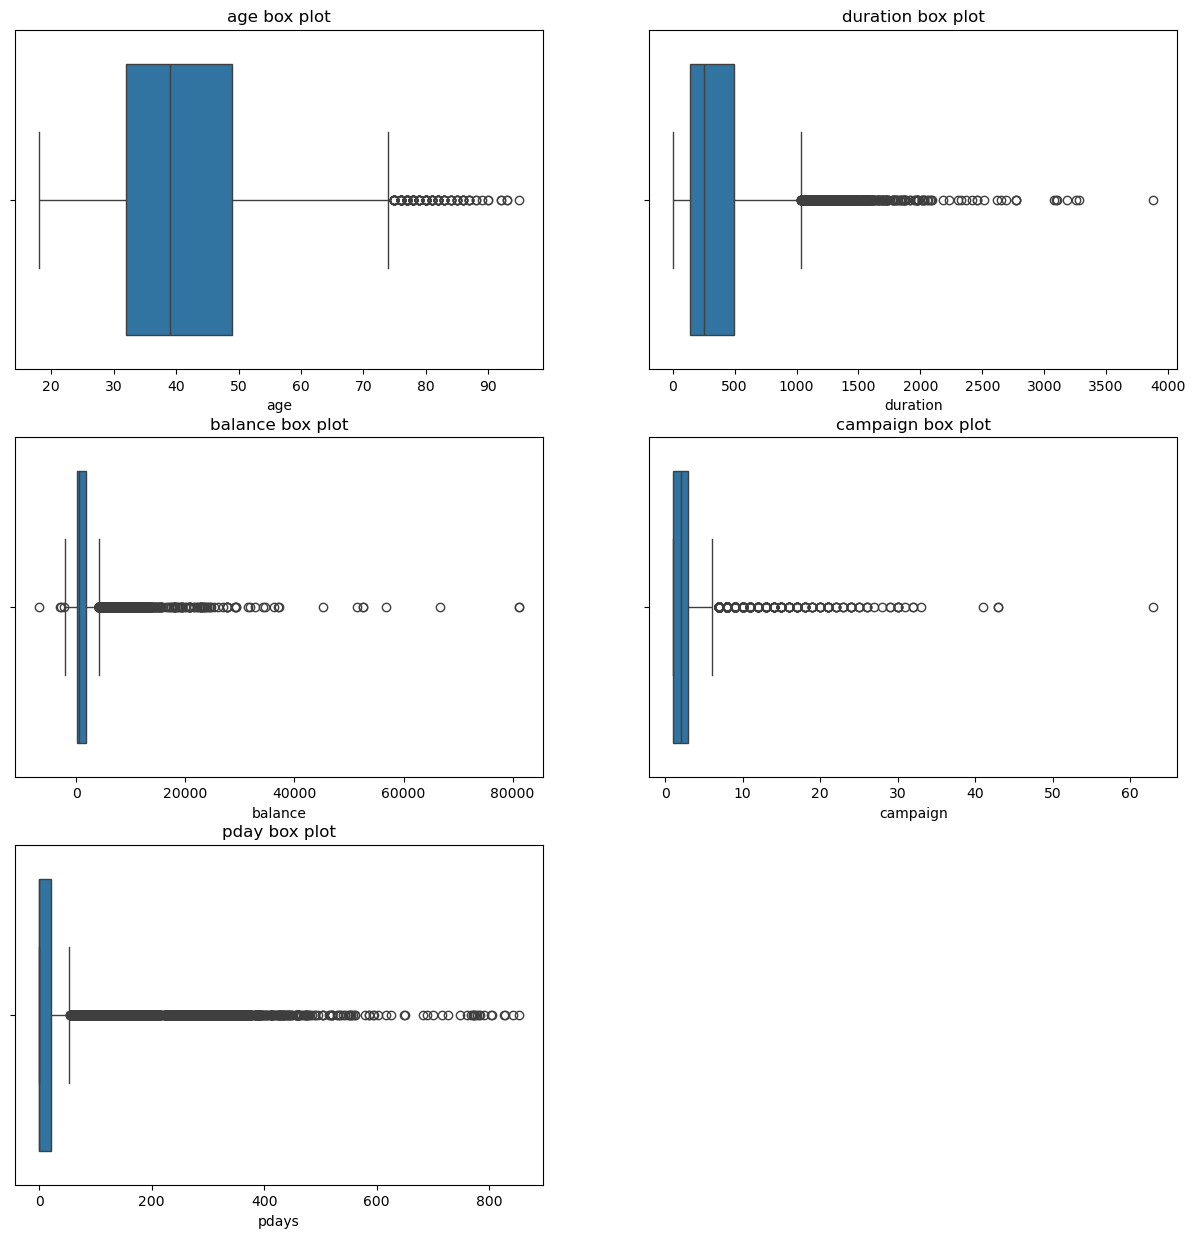

In [65]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title("age box plot")
sns.boxplot(data=data,x=data['age'])
plt.subplot(3,2,2)
plt.title("duration box plot")
sns.boxplot(data=data,x=data['duration'])
plt.subplot(3,2,3)
plt.title("balance box plot")
sns.boxplot(data=data,x=data['balance'])
plt.subplot(3,2,4)
plt.title("campaign box plot")
sns.boxplot(data=data,x=data['campaign'])
plt.subplot(3,2,5)
plt.title("pday box plot")
sns.boxplot(data=data,x=data['pdays'])

In [66]:
updated_cols=['age','balance','duration','campaign','pdays']
for i in updated_cols:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-(1.5*IQR)
    upper_fence=q3+(1.5*IQR)
    lower_outliers=data[data[i]<lower_fence][i].values
    upper_outliers=data[data[i]>upper_fence][i].values
    data[i].replace(lower_outliers,lower_fence,inplace=True)
    data[i].replace(upper_outliers,upper_fence,inplace=True)


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\1545561580.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].replace(lower_outliers,lower_fence,inplace=True)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_7008\1545561580.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

<Axes: title={'center': 'pday box plot'}, xlabel='pdays'>

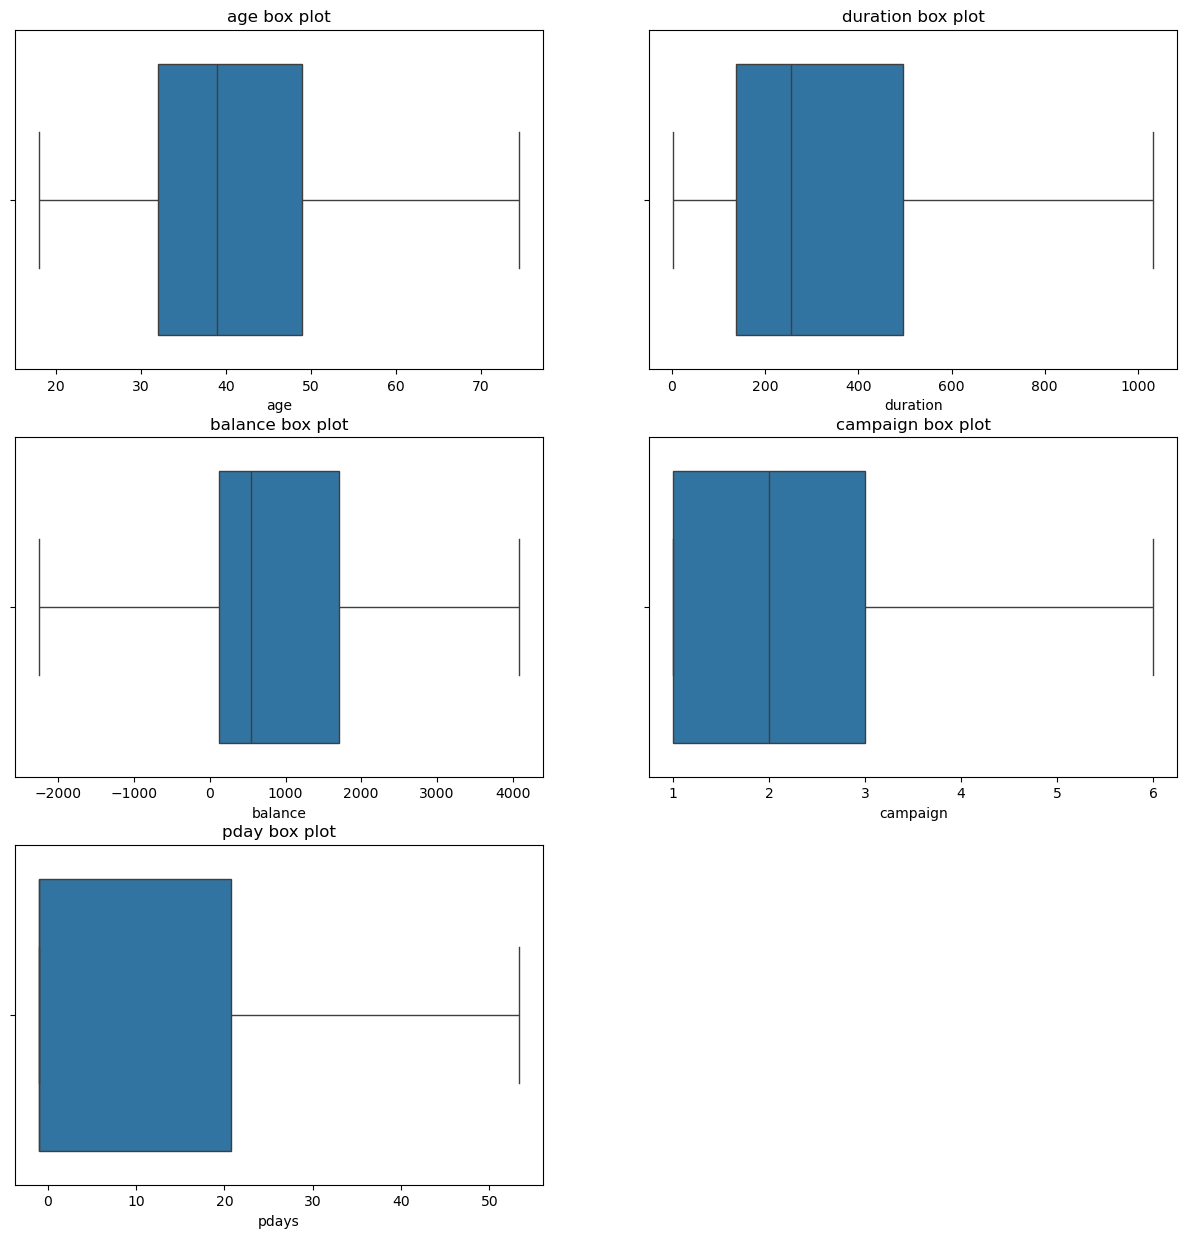

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title("age box plot")
sns.boxplot(data=data,x=data['age'])
plt.subplot(3,2,2)
plt.title("duration box plot")
sns.boxplot(data=data,x=data['duration'])
plt.subplot(3,2,3)
plt.title("balance box plot")
sns.boxplot(data=data,x=data['balance'])
plt.subplot(3,2,4)
plt.title("campaign box plot")
sns.boxplot(data=data,x=data['campaign'])
plt.subplot(3,2,5)
plt.title("pday box plot")
sns.boxplot(data=data,x=data['pdays'])

In [68]:
age_scaler=MinMaxScaler()
data['age']=age_scaler.fit_transform(np.array(data['age']).reshape(-1,1))

In [69]:
balance_scaler=MinMaxScaler()
data['balance']=balance_scaler.fit_transform(np.array(data['balance']).reshape(-1,1))

In [70]:
duration_scaler=MinMaxScaler()
data['duration']=duration_scaler.fit_transform(np.array(data['duration']).reshape(-1,1))

In [71]:
cam_scaler=MinMaxScaler()
data['campaign']=cam_scaler.fit_transform(np.array(data['campaign']).reshape(-1,1))

In [72]:
pdays_scaler=MinMaxScaler()
data['pdays']=pdays_scaler.fit_transform(np.array(data['pdays']).reshape(-1,1))

## Data Splitting

In [73]:
X=data.drop(['deposit'],axis=1).values
Y=data['deposit'].values

In [74]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Data Modeling and Evaluation

Logistic Regression Model

In [75]:
lr=LogisticRegression(penalty="l2",C=1)
lr.fit(x_train,y_train)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [76]:
predict_train=lr.predict(x_train)
predict_test=lr.predict(x_test)

In [77]:
train_acc=accuracy_score(y_train,predict_train)
test_acc=accuracy_score(y_test,predict_test)

In [78]:
print("Training accuracy = ",round(train_acc*100,2),"%")
print("Testing accuracy  = ",round(test_acc*100,2),"%")

Training accuracy =  79.92 %
Testing accuracy  =  79.58 %


In [79]:
report=classification_report(y_test,predict_test)
print("Classification Report : \n")
print(report)

Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1166
           1       0.79      0.77      0.78      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.79      0.80      2233
weighted avg       0.80      0.80      0.80      2233



In [80]:
conf_mat=confusion_matrix(y_test,predict_test)
conf_mat

array([[953, 213],
       [243, 824]], dtype=int64)

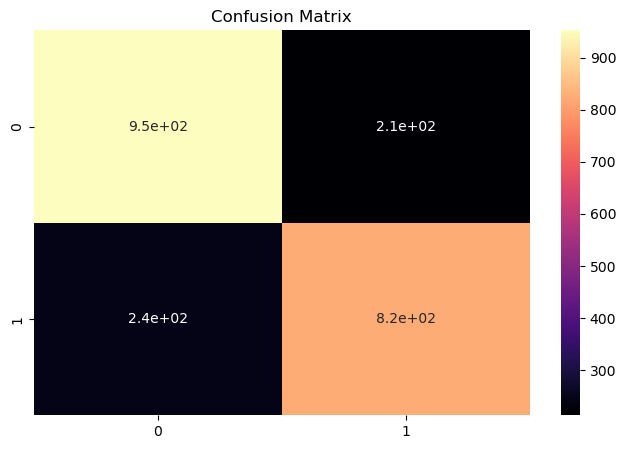

In [81]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat,cmap="magma",annot=True)
plt.show()

Cross Validation for Logistic Regression

In [82]:
k=KFold(n_splits=5)
scores=cross_val_score(lr,x_train,y_train,cv=k)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [83]:
print("scores after applying cross validation of lrc : ",str(scores))
print("average of scores of lrc : ",str(scores.mean()))

scores after applying cross validation of lrc :  [0.79955207 0.79955207 0.78723404 0.80179171 0.80728291]
average of scores of lrc :  0.7990825624762783


SVM Model

In [84]:
svm=SVC(C=1,kernel='linear')
svm.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [85]:
predict_train2=svm.predict(x_train)
predict_test2=svm.predict(x_test)

In [86]:
train_acc2=accuracy_score(y_train,predict_train2)
test_acc2=accuracy_score(y_test,predict_test2)

In [87]:
print("Training accuracy = ",round(train_acc2*100,2),"%")
print("Testing accuracy  = ",round(test_acc2*100,2),"%")

Training accuracy =  80.17 %
Testing accuracy  =  79.58 %


In [88]:
report2=classification_report(y_test,predict_test2)
print("Classification Report : \n")
print(report2)

Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1166
           1       0.79      0.78      0.78      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.79      0.80      2233
weighted avg       0.80      0.80      0.80      2233



In [89]:
conf_mat2=confusion_matrix(y_test,predict_test2)
conf_mat2

array([[949, 217],
       [239, 828]], dtype=int64)

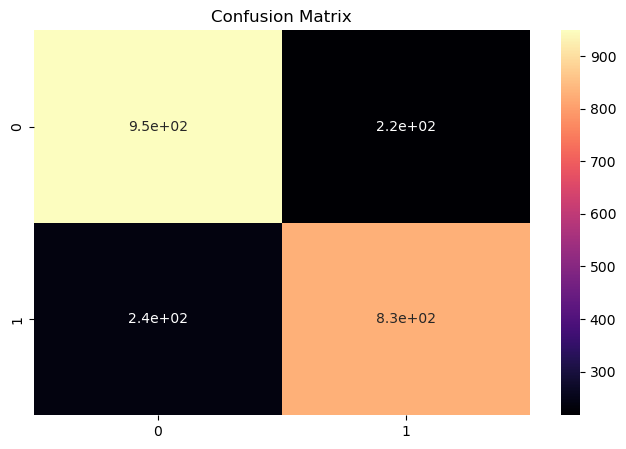

In [90]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat2,cmap="magma",annot=True)
plt.show()

Decision Tree Model

In [91]:
DT=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=42)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [92]:
predict_train3=DT.predict(x_train)
predict_test3=DT.predict(x_test)

In [93]:
train_acc3=accuracy_score(y_train,predict_train3)
test_acc3=accuracy_score(y_test,predict_test3)

In [94]:
print("Training accuracy = ",round(train_acc3*100,2),"%")
print("Testing accuracy  = ",round(test_acc3*100,2),"%")

Training accuracy =  85.27 %
Testing accuracy  =  80.52 %


In [95]:
report3=classification_report(y_test,predict_test3)
print("Classification Report : \n")
print(report3)

Classification Report : 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.79      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.80      0.80      2233
weighted avg       0.81      0.81      0.81      2233



In [96]:
conf_mat3=confusion_matrix(y_test,predict_test3)
conf_mat3

array([[964, 202],
       [233, 834]], dtype=int64)

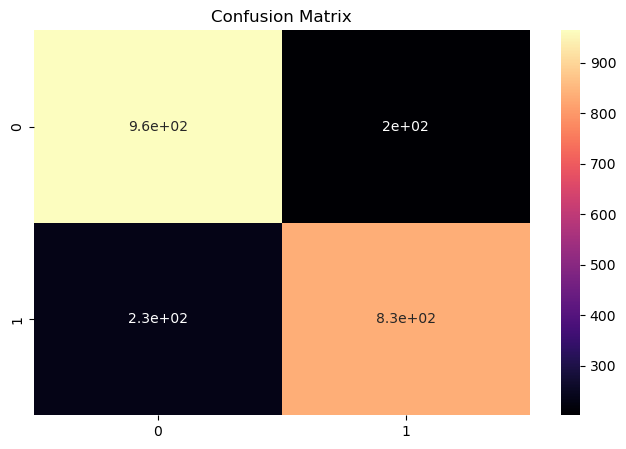

In [97]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat3,cmap="magma",annot=True)
plt.show()

Naive Bayes Model

In [98]:
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [99]:
predict_train4=NB.predict(x_train)
predict_test4=NB.predict(x_test)

In [100]:
train_acc4=accuracy_score(y_train,predict_train4)
test_acc4=accuracy_score(y_test,predict_test4)

In [101]:
print("Training accuracy = ",round(train_acc4*100,2),"%")
print("Testing accuracy  = ",round(test_acc4*100,2),"%")

Training accuracy =  77.19 %
Testing accuracy  =  76.89 %


In [102]:
report4=classification_report(y_test,predict_test4)
print("Classification Report : \n")
print(report4)

Classification Report : 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1166
           1       0.75      0.77      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [103]:
conf_mat4=confusion_matrix(y_test,predict_test4)
conf_mat4

array([[891, 275],
       [241, 826]], dtype=int64)

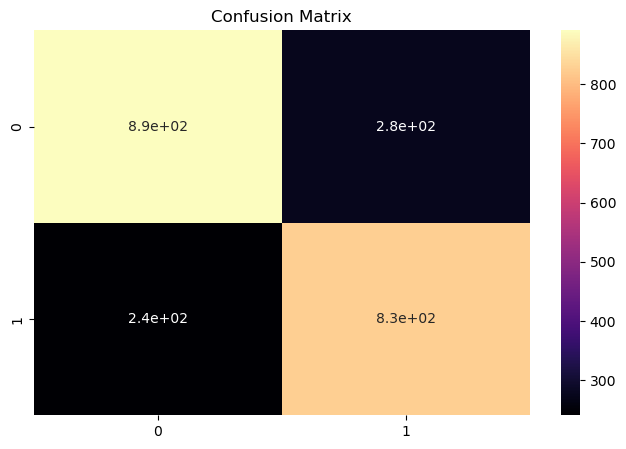

In [104]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat4,cmap="magma",annot=True)
plt.show()

Random Forest Model

In [105]:
RF=RandomForestClassifier(n_estimators=50,max_depth=8,criterion='gini',random_state=42)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [106]:
predict_train5=RF.predict(x_train)
predict_test5=RF.predict(x_test)

In [107]:
train_acc5=accuracy_score(y_train,predict_train5)
test_acc5=accuracy_score(y_test,predict_test5)

In [108]:
print("Training accuracy = ",round(train_acc5*100,2),"%")
print("Testing accuracy  = ",round(test_acc5*100,2),"%")

Training accuracy =  85.66 %
Testing accuracy  =  81.37 %


In [109]:
report5=classification_report(y_test,predict_test5)
print("Classification Report : \n")
print(report5)

Classification Report : 

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1166
           1       0.78      0.84      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.82      0.81      0.81      2233



In [110]:
conf_mat5=confusion_matrix(y_test,predict_test5)
conf_mat5

array([[918, 248],
       [168, 899]], dtype=int64)

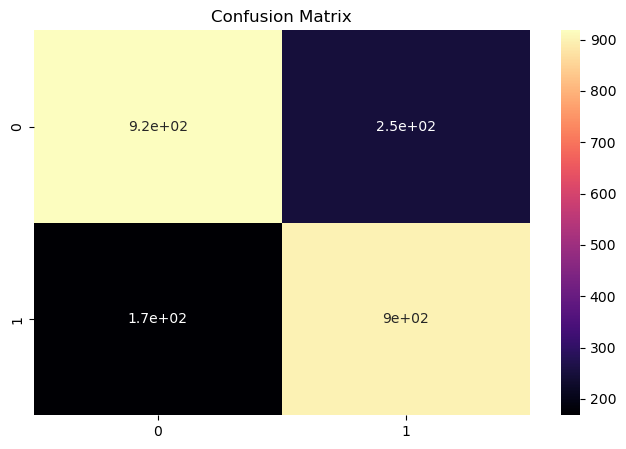

In [111]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat5,cmap="magma",annot=True)
plt.show()

KNN Model

In [112]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [113]:
predict_train6=knn.predict(x_train)
predict_test6=knn.predict(x_test)

In [114]:
train_acc6=accuracy_score(y_train,predict_train6)
test_acc6=accuracy_score(y_test,predict_test6)

In [115]:
print("Training accuracy = ",round(train_acc6*100,2),"%")
print("Testing accuracy  = ",round(test_acc6*100,2),"%")

Training accuracy =  84.66 %
Testing accuracy  =  70.13 %


In [116]:
report6=classification_report(y_test,predict_test6)
print("Classification Report : \n")
print(report6)

Classification Report : 

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1166
           1       0.72      0.62      0.66      1067

    accuracy                           0.70      2233
   macro avg       0.70      0.70      0.70      2233
weighted avg       0.70      0.70      0.70      2233



In [117]:
conf_mat6=confusion_matrix(y_test,predict_test6)
conf_mat6

array([[905, 261],
       [406, 661]], dtype=int64)

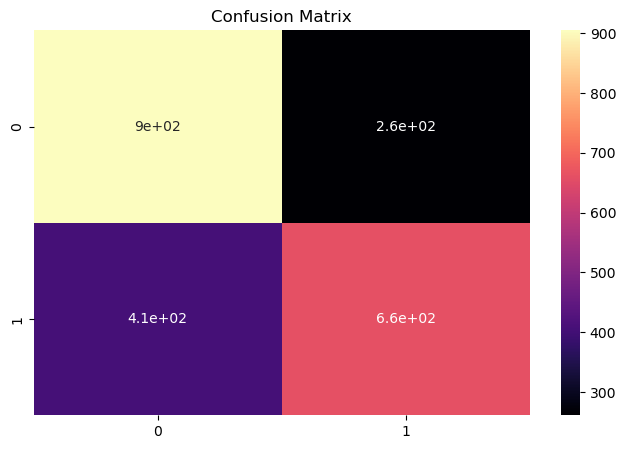

In [118]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat6,cmap="magma",annot=True)
plt.show()

Boosting Model

In [119]:
boost=AdaBoostClassifier(estimator=NB,algorithm='SAMME.R',n_estimators=50,learning_rate=0.001,random_state=42)
boost.fit(x_train,y_train)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=GaussianNB(), learning_rate=0.001, random_state=42)

In [120]:
boost2=AdaBoostClassifier(estimator=svm,algorithm='SAMME',n_estimators=10,learning_rate=0.001,random_state=42)
boost2.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=SVC(C=1, kernel='linear'),
                   learning_rate=0.001, n_estimators=10, random_state=42)

In [121]:
predict_train7=boost.predict(x_train)
predict_test7=boost.predict(x_test)

In [122]:
train_acc7=accuracy_score(y_train,predict_train7)
test_acc7=accuracy_score(y_test,predict_test7)

In [123]:
print("Training accuracy = ",round(train_acc7*100,2),"%")
print("Testing accuracy  = ",round(test_acc7*100,2),"%")

Training accuracy =  77.59 %
Testing accuracy  =  77.16 %


In [124]:
report7=classification_report(y_test,predict_test7)
print("Classification Report : \n")
print(report7)

Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1166
           1       0.75      0.79      0.77      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [125]:
conf_mat7=confusion_matrix(y_test,predict_test7)
conf_mat7

array([[878, 288],
       [222, 845]], dtype=int64)

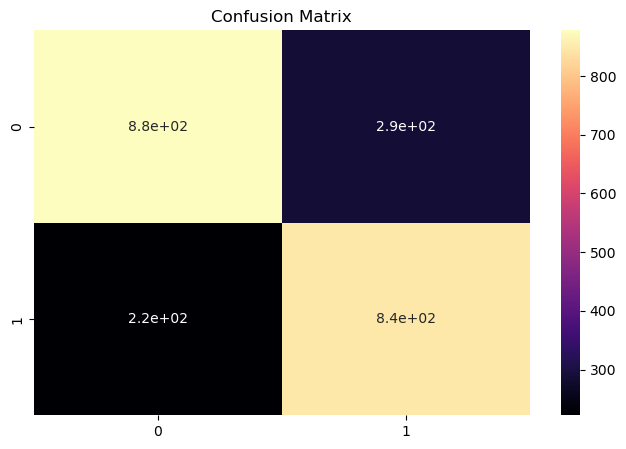

In [126]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat7,cmap="magma",annot=True)
plt.show()

Bagging Model

In [127]:
bag=BaggingClassifier(estimator=NB,n_estimators=50,random_state=42)
bag.fit(x_train,y_train)

BaggingClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42)

In [128]:
predict_train8=bag.predict(x_train)
predict_test8=bag.predict(x_test)

In [129]:
train_acc8=accuracy_score(y_train,predict_train8)
test_acc8=accuracy_score(y_test,predict_test8)

In [130]:
print("Training accuracy = ",round(train_acc8*100,2),"%")
print("Testing accuracy  = ",round(test_acc8*100,2),"%")

Training accuracy =  77.19 %
Testing accuracy  =  76.76 %


In [131]:
report8=classification_report(y_test,predict_test8)
print("Classification Report : \n")
print(report8)

Classification Report : 

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1166
           1       0.75      0.78      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [132]:
conf_mat8=confusion_matrix(y_test,predict_test8)
conf_mat8

array([[886, 280],
       [239, 828]], dtype=int64)

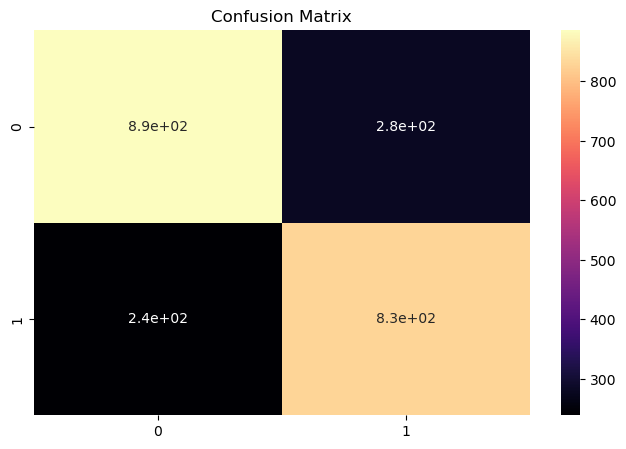

In [133]:
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat8,cmap="magma",annot=True)
plt.show()

## Testing models By input record

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  int32  
 2   marital    11162 non-null  int32  
 3   education  11162 non-null  int32  
 4   balance    11162 non-null  float64
 5   housing    11162 non-null  int32  
 6   loan       11162 non-null  int32  
 7   contact    11162 non-null  int32  
 8   day        11162 non-null  int64  
 9   month      11162 non-null  int32  
 10  duration   11162 non-null  float64
 11  campaign   11162 non-null  float64
 12  pdays      11162 non-null  float64
 13  previous   11162 non-null  int64  
 14  deposit    11162 non-null  int32  
dtypes: float64(5), int32(8), int64(2)
memory usage: 959.4 KB


In [135]:
age=age_scaler.transform(np.array([23]).reshape(-1,1))
job=job_lbl.transform(np.array(['management']).reshape(-1,1))
marital=mar_lbl.transform(np.array(['single']).reshape(-1,1))
edu=edu_lbl.transform(np.array(['secondary']).reshape(-1,1))
balance=balance_scaler.transform(np.array([1500]).reshape(-1,1))
housing=house_lbl.transform(np.array(['no']).reshape(-1,1))
loan=loan_lbl.transform(np.array(['no']).reshape(-1,1))
contact=con_lbl.transform(np.array(['telephone']).reshape(-1,1))
day=15
month=mon_lbl.transform(np.array(['oct']).reshape(-1,1))
duration=duration_scaler.transform(np.array([11500]).reshape(-1,1))
campaign=cam_scaler.transform(np.array([52]).reshape(-1,1))
pdays=pdays_scaler.transform(np.array([12]).reshape(-1,1))
previous=0

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A

In [136]:
test_record=np.array([age[0][0],job[0],marital[0],edu[0],balance[0][0],housing[0],loan[0],
                    contact[0],day,month[0],duration[0][0],campaign[0][0],pdays[0][0],previous])

In [137]:
test_record=test_record.reshape(1,-1)
test_record.shape

(1, 14)

In [138]:
predict_record=lr.predict(test_record)
predict_record

array([1])

In [139]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

In [140]:
predict_record=svm.predict(test_record)
predict_record

array([1])

In [141]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

In [142]:
predict_record=DT.predict(test_record)
predict_record

array([1])

In [143]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

In [144]:
predict_record=knn.predict(test_record)
predict_record

array([1])

In [145]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

In [146]:
predict_record=RF.predict(test_record)
predict_record

array([1])

In [147]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

In [148]:
predict_record=NB.predict(test_record)
predict_record

array([1])

In [149]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

In [150]:
predict_record=boost.predict(test_record)
predict_record

array([1])

In [151]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

In [152]:
predict_record=bag.predict(test_record)
predict_record

array([1])

In [153]:
predict_label=dep_lbl.inverse_transform(predict_record)
predict_label[0]

'yes'

## Save Models

In [154]:
pickle.dump(lr,open(r'models\LRC_model.pkl','wb'))
pickle.dump(svm,open(r'models\SVM_model.pkl','wb'))
pickle.dump(DT,open(r'models\DTC_model.pkl','wb'))
pickle.dump(knn,open(r'models\KNN_model.pkl','wb'))
pickle.dump(RF,open(r'models\RFC_model.pkl','wb'))
pickle.dump(NB,open(r'models\NBC_model.pkl','wb'))
pickle.dump(boost,open(r'models\Boost_model.pkl','wb'))
pickle.dump(bag,open(r'models\Bagging_model.pkl','wb'))

## Load Models

In [157]:
def load_models():
    file = open(r'models\LRC_model.pkl', 'rb')
    lr= pickle.load(file)   
    file = open(r'models\SVM_model.pkl', 'rb')
    svm= pickle.load(file) 
    file = open(r'models\DTC_model.pkl', 'rb')
    DT= pickle.load(file) 
    file = open(r'models\KNN_model.pkl', 'rb')
    knn= pickle.load(file) 
    file = open(r'models\RFC_model.pkl', 'rb')
    RF= pickle.load(file)
    file = open(r'models\NBC_model.pkl', 'rb')
    NB= pickle.load(file)
    file = open(r'models\Boost_model.pkl','rb')
    boost= pickle.load(file)
    file = open(r'models\Bagging_model.pkl','rb')
    bag= pickle.load(file)

    return lr,svm,DT,knn,RF,NB,boost,bag  

In [158]:
lr,svm,DT,knn,RF,NB,boost,bag =load_models()